In [13]:
import math
import numpy as np
import pandas as pd
import h5py
import scipy
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers
from tensorflow.python.framework import ops
from Constants_utils import *
%matplotlib inline

In [14]:
X_train, y_train, X_test, y_test, classes = load_handsigns_dataset()

y = 1


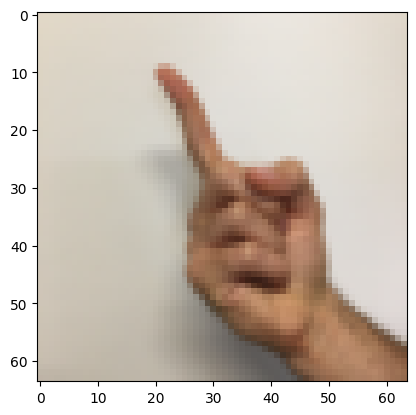

In [15]:
idx = 11
plt.imshow(X_train[idx])
print("y = " + str(np.squeeze(y_train[:, idx])))

In [16]:
X_train = X_train / 255.
X_test = X_test / 255.
y_train = one_hot_encoding(y_train, 6).T
y_test = one_hot_encoding(y_test, 6).T
print("Training samples: " + str(X_train.shape[0]))
print("Test samples: " + str(X_test.shape[0]))
print("X_train set shape: " + str(X_train.shape))
print("X_test set shape: " + str(X_test.shape))
print("y_train ste shape: " + str(y_train.shape))
print("y_test set shape : " + str(y_test.shape))

Training samples: 1080
Test samples: 120
X_train set shape: (1080, 64, 64, 3)
X_test set shape: (120, 64, 64, 3)
y_train ste shape: (1080, 6)
y_test set shape : (120, 6)


In [17]:
def model(input_shape):
    
    inputs = keras.Input(shape = input_shape)
    x = layers.Conv2D(64, (4, 4), strides = (1, 1), padding = 'same')(inputs)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size = (8, 8), strides = (8, 8), padding = 'same')(x)
    x = layers.Dropout(0.25)(x)
    x = layers.Conv2D(128, (2, 2), strides = (1, 1), padding = 'same')(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size = (4, 4), strides = (4, 4), padding = 'same')(x)
    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation = 'relu')(x)
    x = layers.Dropout(0.25)(x)
    outputs = layers.Dense(6, activation = 'softmax')(x)
    
    model = keras.Model(inputs = inputs, outputs = outputs)
    return model

In [18]:
model = model((64, 64, 3))

In [19]:
#train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
#test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [20]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [21]:
history = model.fit(X_train, y_train, 
                    epochs = 200,
                    validation_data = (X_test, y_test), 
                    batch_size = 64,
                    verbose = 2)

Epoch 1/200


17/17 - 5s - loss: 1.8169 - accuracy: 0.1565 - val_loss: 1.7903 - val_accuracy: 0.2167 - 5s/epoch - 320ms/step
Epoch 2/200
17/17 - 4s - loss: 1.7936 - accuracy: 0.1833 - val_loss: 1.7852 - val_accuracy: 0.1833 - 4s/epoch - 217ms/step
Epoch 3/200
17/17 - 4s - loss: 1.7856 - accuracy: 0.2000 - val_loss: 1.7799 - val_accuracy: 0.2167 - 4s/epoch - 219ms/step
Epoch 4/200
17/17 - 4s - loss: 1.7780 - accuracy: 0.2139 - val_loss: 1.7742 - val_accuracy: 0.2083 - 4s/epoch - 217ms/step
Epoch 5/200
17/17 - 4s - loss: 1.7632 - accuracy: 0.2444 - val_loss: 1.7477 - val_accuracy: 0.2750 - 4s/epoch - 225ms/step
Epoch 6/200
17/17 - 3s - loss: 1.7264 - accuracy: 0.2694 - val_loss: 1.7079 - val_accuracy: 0.3000 - 3s/epoch - 185ms/step
Epoch 7/200
17/17 - 4s - loss: 1.6926 - accuracy: 0.2935 - val_loss: 1.6435 - val_accuracy: 0.3917 - 4s/epoch - 226ms/step
Epoch 8/200
17/17 - 3s - loss: 1.6218 - accuracy: 0.3509 - val_loss: 1.5482 - val_accuracy: 0.4750 - 3s/epoch - 190ms/step
Epoch 9/200
17/17 - 4s - los

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

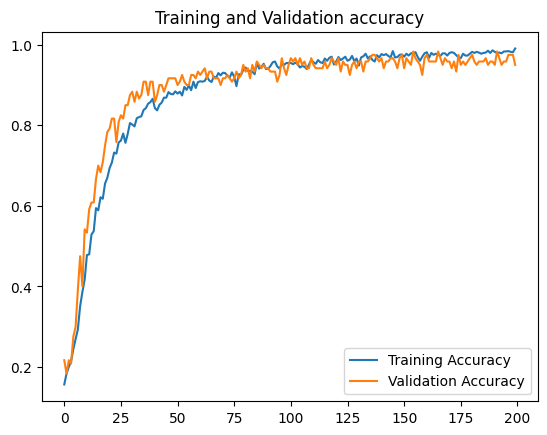

In [23]:
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation accuracy")
plt.show()

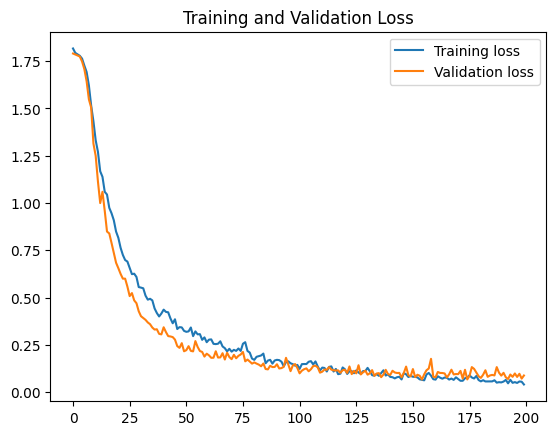

In [24]:
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend(loc = 'upper right')
plt.title("Training and Validation Loss")
plt.show()